# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data_all = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
# Merging resource data with all data points.
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data_all, price_data, on='id', how='left')

In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 19)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved'
 'price' 'quantity']


In [5]:
# Time based splitting
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]

project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   

        price  quantity  
55660  725.05         4  
76127  213.03         8

## 1.2 preprocessing of `project_subject_categories`

In [6]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [7]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [8]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [9]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
55660                                            53                    1   
76127                                             4                    1   

        price  quantity clean_categories                 clean_subcategories  \
55660  725.05         4     Math_Science  AppliedSciences Health_LifeScience   
76127  213.03         8     SpecialNeeds                        SpecialNeeds   

                                                   essay  
55660  I have been fortunate enough to use the Fairy ...  
76127  Imagine being 8-9 years old. You're in your th...

In [10]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [11]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [12]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

\"A person is a person, no matter how small.\" (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed. \r\nStudents in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.\r\nOur school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the ear

In [14]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 A person is a person, no matter how small.  (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed.   Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.  Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the early chi

In [15]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 A person is a person no matter how small Dr Seuss I teach the smallest students with the biggest enthusiasm for learning My students learn in many different ways using all of our senses and multiple intelligences I use a wide range of techniques to help all my students succeed Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures including Native Americans Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom Kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it is mastered Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum Montana is the perfect place to learn about agriculture and nutrition My students love to role play in our pretend kitchen in the early childhood classroom

In [16]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [17]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e.lower() for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.strip())

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [02:27<00:00, 739.64it/s]


In [18]:
# after preprocesing
preprocessed_essays[20000]

'person person no matter small dr seuss teach smallest students biggest enthusiasm learning students learn many different ways using senses multiple intelligences use wide range techniques help students succeed students class come variety different backgrounds makes wonderful sharing experiences cultures including native americans school caring community successful learners seen collaborative student project based learning classroom kindergarteners class love work hands materials many different opportunities practice skill mastered social skills work cooperatively friends crucial aspect kindergarten curriculum montana perfect place learn agriculture nutrition students love role play pretend kitchen early childhood classroom several kids ask try cooking real food take idea create common core cooking lessons learn important math writing concepts cooking delicious healthy food snack time students grounded appreciation work went making food knowledge ingredients came well healthy bodies pr

In [19]:
project_data['clean_preprocessed_essays'] = preprocessed_essays
project_data.drop(['essay'], axis=1, inplace=True)
project_data.drop(['project_essay_1'], axis=1, inplace=True)
project_data.drop(['project_essay_2'], axis=1, inplace=True)
project_data.drop(['project_essay_3'], axis=1, inplace=True)
project_data.drop(['project_essay_4'], axis=1, inplace=True)

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [20]:
# learned from the above codes (used above code and concept)
preprocessed_titles = []
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    sent = ' '.join(e.lower() for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles.append(sent.strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:06<00:00, 15956.03it/s]


In [21]:
preprocessed_titles[100]

'ican ipads'

In [22]:
project_data['clean_preprocessed_titles'] = preprocessed_titles
project_data.drop(['project_title'], axis=1, inplace=True)

<b> <font color = "blue"> preprocessing teacher_prefix </font></b>

In [27]:
project_data['teacher_prefix'].value_counts()
#'Mrs' is the most frequent category

Mrs.       57269
Ms.        38955
Mr.        10648
Teacher     2360
Dr.           13
Name: teacher_prefix, dtype: int64

In [28]:
project_data.loc[project_data['teacher_prefix'].isna()]
# for three rows we got NaN 
# we replace NaN with 'Mrs' as it occurs most frequently.

Unnamed: 0       id                        teacher_id teacher_prefix  \
30368       22174  p002730  339bd5a9e445d68a74d65b99cd325397            NaN   
57654      158692  p197901  e4be6aaaa887d4202df2b647fbfc82bb            NaN   
7820        17809  p180947  834f75f1b5e24bd10abe9c3dbf7ba12f            NaN   

      school_state                Date project_grade_category  \
30368           SC 2016-05-09 09:38:40            Grades 9-12   
57654           PA 2016-06-03 10:15:05             Grades 3-5   
7820            CA 2016-11-04 00:15:45             Grades 3-5   

                                project_resource_summary  \
30368        My students need 5 iPads for STEM stations.   
57654  My students need a Smart Document Camera to en...   
7820   My students need a classroom laptop that is ju...   

       teacher_number_of_previously_posted_projects  project_is_approved  \
30368                                             0                    1   
57654                                             0                    1   
7820                                              1                    1   

        price  quantity                clean_categories  \
30368  285.86        16               Literacy_Language   
57654  145.29         2  Literacy_Language Math_Science   
7820   910.87         2  Literacy_Language Math_Science   

                  clean_subcategories  \
30368              Literature_Writing   
57654            Literacy Mathematics   
7820   Literature_Writing Mathematics   

                               clean_preprocessed_essays  \
30368  within next 20 years every job involve form te...   
57654  students robertsdale elementary live low socio...   
7820   children anna yates elementary school expressi...   

                           clean_preprocessed_titles  
30368                            ipads stem stations  
57654                                document camera  
7820   1 7 increasing tech decrease achievement gaps

In [29]:
# removing '.' from last of each word except 'Teacher' 'nan'
teacher_pre = []
for prefix in tqdm(project_data['teacher_prefix']):
    a = str(prefix)
    if a == 'Teacher':
        teacher_pre.append(a)
    elif a == 'nan':
        teacher_pre.append('Mrs')
    else:    
        teacher_pre.append(a[:len(a)-1])



project_data['clean_teacher_prefix'] = teacher_pre
project_data.drop(['teacher_prefix'], axis=1, inplace=True)

100%|██████████████████████████████████████████████████████████████████████| 109248/109248 [00:00<00:00, 733033.63it/s]


<b> <font color = "blue"> preprocessing project_grade_category </font></b>

In [30]:
# replacing '-' with 'to'
grade_cat = []
i = 1
for grade in tqdm(project_data['project_grade_category']):
    a = str(grade)[7:]
    grade_cat.append(a.replace('-','to'))



project_data['clean_project_grade_category'] = grade_cat
project_data.drop(['project_grade_category'], axis=1, inplace=True)

100%|██████████████████████████████████████████████████████████████████████| 109248/109248 [00:00<00:00, 677213.11it/s]


<h1> <font color = "blue"> creating new features (essay_length and title_length) </font></h1>

In [31]:
#simple code of string length
essay_length = []
title_length = []
for sentence in tqdm(project_data['clean_preprocessed_essays']):
    count = 0
    essay_length.append(len(sentence.split()))

for sentence in tqdm(project_data['clean_preprocessed_titles']):
    count = 0
    title_length.append(len(sentence.split()))   
    

100%|██████████████████████████████████████████████████████████████████████| 109248/109248 [00:00<00:00, 560501.28it/s]


In [32]:
project_data['essay_length'] = essay_length
project_data['title_length'] = title_length

<h1> <font color = "blue"> computing sentiment score </font></h1>

In [33]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
sentiment = []

for sentence in tqdm(project_data['clean_preprocessed_essays'].values):
    ss = sid.polarity_scores(sentence)
    sentiment.append(ss)


# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [07:12<00:00, 252.79it/s]


In [34]:
print(sentiment[1000])

{'neg': 0.016, 'neu': 0.721, 'pos': 0.263, 'compound': 0.9957}


In [35]:
sentiment_negative = []
sentiment_positive = []
sentiment_neutral = []
sentiment_compound = []

for sen in sentiment:
    sentiment_negative.append(sen['neg'])
    sentiment_positive.append(sen['pos'])
    sentiment_neutral.append(sen['neu'])
    sentiment_compound.append(sen['compound'])
    

In [36]:
project_data['sentiment_negative'] = sentiment_negative
project_data['sentiment_positive'] = sentiment_positive
project_data['sentiment_neutral'] = sentiment_neutral
project_data['sentiment_compound'] = sentiment_compound

## 1.5 Preparing data for models

In [31]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'school_state', 'Date',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories',
       'clean_preprocessed_essays', 'clean_preprocessed_titles',
       'clean_teacher_prefix', 'clean_project_grade_category', 'essay_length',
       'title_length', 'sentiment_negative', 'sentiment_positive',
       'sentiment_neutral', 'sentiment_compound'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

## splitting of data

In [37]:
# creating our data points(X,Y)
Y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)
X = project_data

In [38]:
# train test split
# taking 30% data for test and 70% data for train
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, stratify=Y)


In [39]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(76473, 21) (76473,)
(32775, 21) (32775,)


In [40]:
x_train.head(2)

Unnamed: 0       id                        teacher_id school_state  \
921        125048  p232715  fdebec8541274a43e44f3d6a00290e60           FL   
78543       66784  p161023  6614dda4faa917e5cfc6e9150ef0bf1f           FL   

                     Date                           project_resource_summary  \
921   2017-03-04 09:20:21  My students need these Chromebooks to allow th...   
78543 2016-09-29 23:46:42  My students need iPads to take them beyond the...   

       teacher_number_of_previously_posted_projects   price  quantity  \
921                                               1  187.16         2   
78543                                             2  553.22         5   

                     clean_categories         ...          \
921                      Math_Science         ...           
78543  Literacy_Language Math_Science         ...           

                               clean_preprocessed_essays  \
921    students class attend title school meaning maj...   
78543  students love learn everyday come classroom re...   

          clean_preprocessed_titles clean_teacher_prefix  \
921    chromebooks enhance learning                  Mrs   
78543                      app ipad                  Mrs   

      clean_project_grade_category essay_length  title_length  \
921                           3to5          140             3   
78543                      PreKto2          133             2   

       sentiment_negative  sentiment_positive  sentiment_neutral  \
921                 0.045               0.172              0.783   
78543               0.000               0.361              0.639   

       sentiment_compound  
921                0.9546  
78543              0.9953  

[2 rows x 21 columns]

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [41]:
# we use count vectorizer to convert the values into one hot encoding
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(x_train['clean_categories'].values)

x_train_categories_ohe = vectorizer.transform(x_train['clean_categories'].values)
x_test_categories_ohe = vectorizer.transform(x_test['clean_categories'].values)
print(vectorizer.get_feature_names())
print("-"*100)
print("After vectorizations")
print(x_train_categories_ohe.shape, y_train.shape)
print(x_test_categories_ohe.shape, y_test.shape)

['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']
----------------------------------------------------------------------------------------------------
After vectorizations
(76473, 9) (76473,)
(32775, 9) (32775,)


In [42]:

feature_name_bow = [feature for feature in vectorizer.get_feature_names()]
feature_name_tfidf = [feature for feature in vectorizer.get_feature_names()]
print(len(feature_name_bow))
print(len(feature_name_tfidf))

9
9


In [43]:
# sub categories
vectorizer = CountVectorizer()
vectorizer.fit(x_train['clean_subcategories'].values)

x_train_subcategories_ohe = vectorizer.transform(x_train['clean_subcategories'].values)
x_test_subcategories_ohe = vectorizer.transform(x_test['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("-"*100)
print("After vectorizations")
print(x_train_subcategories_ohe.shape, y_train.shape)
print(x_test_subcategories_ohe.shape, y_test.shape)

['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']
----------------------------------------------------------------------------------------------------
After vectorizations
(76473, 30) (76473,)
(32775, 30) (32775,)


In [44]:
for feature in vectorizer.get_feature_names():
    feature_name_bow.append(feature)
    feature_name_tfidf.append(feature)
    
print(len(feature_name_bow))
print(len(feature_name_tfidf))

39
39


In [45]:
#states
vectorizer = CountVectorizer()
vectorizer.fit(x_train['school_state'].values)
x_train_state_ohe = vectorizer.transform(x_train['school_state'].values)
x_test_state_ohe = vectorizer.transform(x_test['school_state'].values)
print(vectorizer.get_feature_names())
print("-"*100)
print("After vectorizations")
print(x_train_state_ohe.shape, y_train.shape)
print(x_test_state_ohe.shape, y_test.shape)

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
----------------------------------------------------------------------------------------------------
After vectorizations
(76473, 51) (76473,)
(32775, 51) (32775,)


In [46]:
for feature in vectorizer.get_feature_names():
    feature_name_bow.append(feature)
    feature_name_tfidf.append(feature)
    
print(len(feature_name_bow))
print(len(feature_name_tfidf))

90
90


<b> <font color = "blue"> One hot encoding for teacher_prefix </font></b>

In [47]:
# teacher prefix
vectorizer = CountVectorizer()
vectorizer.fit(x_train['clean_teacher_prefix'].values)
x_train_teacher_prefix_ohe = vectorizer.transform(x_train['clean_teacher_prefix'].values)
x_test_teacher_prefix_ohe = vectorizer.transform(x_test['clean_teacher_prefix'].values)
print(vectorizer.get_feature_names())
print("-"*100)
print("After vectorizations")
print(x_train_teacher_prefix_ohe.shape, y_train.shape)
print(x_test_teacher_prefix_ohe.shape, y_test.shape)

['dr', 'mr', 'mrs', 'ms', 'teacher']
----------------------------------------------------------------------------------------------------
After vectorizations
(76473, 5) (76473,)
(32775, 5) (32775,)


In [48]:
for feature in vectorizer.get_feature_names():
    feature_name_bow.append(feature)
    feature_name_tfidf.append(feature)
    
print(len(feature_name_bow))
print(len(feature_name_tfidf))

95
95


<b> <font color = "blue"> One hot encoding for project_grade_category </font></b>

In [49]:
#project_grade_category
vectorizer = CountVectorizer()
vectorizer.fit(x_train['clean_project_grade_category'].values)
x_train_project_grade_ohe = vectorizer.transform(x_train['clean_project_grade_category'].values)
x_test_project_grade_ohe = vectorizer.transform(x_test['clean_project_grade_category'].values)
print(vectorizer.get_feature_names())
print("-"*100)
print("After vectorizations")
print(x_train_project_grade_ohe.shape, y_train.shape)
print(x_test_project_grade_ohe.shape, y_test.shape)

['3to5', '6to8', '9to12', 'prekto2']
----------------------------------------------------------------------------------------------------
After vectorizations
(76473, 4) (76473,)
(32775, 4) (32775,)


In [50]:
for feature in vectorizer.get_feature_names():
    feature_name_bow.append(feature)
    feature_name_tfidf.append(feature)
    
print(len(feature_name_bow))
print(len(feature_name_tfidf))

99
99


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [51]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
#Essays
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2))
vectorizer.fit(x_train['clean_preprocessed_essays'].values)

x_train_essay_bow = vectorizer.transform(x_train['clean_preprocessed_essays'])
x_test_essay_bow = vectorizer.transform(x_test['clean_preprocessed_essays'])
print("-"*100)
print("After vectorizations")
print(x_train_essay_bow.shape, y_train.shape)
print(x_test_essay_bow.shape, y_test.shape)

----------------------------------------------------------------------------------------------------
After vectorizations
(76473, 144279) (76473,)
(32775, 144279) (32775,)


In [52]:
for feature in vectorizer.get_feature_names():
    feature_name_bow.append(feature)
    
    
print(len(feature_name_bow))

144378


In [53]:

# Titles
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2))
vectorizer.fit(x_train['clean_preprocessed_titles'].values)

x_train_title_bow = vectorizer.transform(x_train['clean_preprocessed_titles'])
x_test_title_bow = vectorizer.transform(x_test['clean_preprocessed_titles'])
print("-"*100)
print("After vectorizations")
print(x_train_title_bow.shape, y_train.shape)
print(x_test_title_bow.shape, y_test.shape)

----------------------------------------------------------------------------------------------------
After vectorizations
(76473, 4737) (76473,)
(32775, 4737) (32775,)


In [54]:
for feature in vectorizer.get_feature_names():
    feature_name_bow.append(feature)
    
print(len(feature_name_bow))


149115


#### 1.5.2.2 TFIDF vectorizer

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,2))
vectorizer.fit(x_train['clean_preprocessed_essays'].values)

x_train_essay_tfidf = vectorizer.transform(x_train['clean_preprocessed_essays'])
x_test_essay_tfidf = vectorizer.transform(x_test['clean_preprocessed_essays'])
print("-"*100)
print("After vectorizations")
print(x_train_essay_tfidf.shape, y_train.shape)
print(x_test_essay_tfidf.shape, y_test.shape)

----------------------------------------------------------------------------------------------------
After vectorizations
(76473, 144279) (76473,)
(32775, 144279) (32775,)


In [56]:
for feature in vectorizer.get_feature_names():
    feature_name_tfidf.append(feature)
    
print(len(feature_name_tfidf))

144378


In [57]:
#titles tfidf

vectorizer = CountVectorizer(min_df=10,ngram_range=(1,2))
vectorizer.fit(x_train['clean_preprocessed_titles'].values)

x_train_title_tfidf = vectorizer.transform(x_train['clean_preprocessed_titles'])
x_test_title_tfidf = vectorizer.transform(x_test['clean_preprocessed_titles'])
print("-"*100)
print("After vectorizations")
print(x_train_title_tfidf.shape, y_train.shape)
print(x_test_title_tfidf.shape, y_test.shape)

----------------------------------------------------------------------------------------------------
After vectorizations
(76473, 4737) (76473,)
(32775, 4737) (32775,)


In [58]:
for feature in vectorizer.get_feature_names():
    feature_name_tfidf.append(feature)
    
print(len(feature_name_tfidf))

149115


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [59]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [60]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [61]:
# average Word2Vec
# compute average word2vec for each essay.
x_train_avg_w2v_essays = [];
x_cv_avg_w2v_essays = [];
x_test_avg_w2v_essays = [];
# for train
for sentence in tqdm(x_train['clean_preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    x_train_avg_w2v_essays.append(vector)
    

# for test    
for sentence in tqdm(x_test['clean_preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    x_test_avg_w2v_essays.append(vector)    


100%|██████████████████████████████████████████████████████████████████████████| 32775/32775 [00:19<00:00, 1695.20it/s]


In [62]:
print("for train")
print(len(x_train_avg_w2v_essays))
print(len(x_train_avg_w2v_essays[0]))
print("for test")
print(len(x_test_avg_w2v_essays))
print(len(x_test_avg_w2v_essays[0]))

for train
76473
300
for test
32775
300


## Titles avg w2vec

In [63]:
# average word2vec on project_titles

# average Word2Vec
# compute average word2vec for each essay.
x_train_avg_w2v_titles = [];
x_cv_avg_w2v_titles = [];
x_test_avg_w2v_titles = [];
#for train
for sentence in tqdm(x_train['clean_preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    x_train_avg_w2v_titles.append(vector)


# for test    
for sentence in tqdm(x_test['clean_preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    x_test_avg_w2v_titles.append(vector)    


100%|█████████████████████████████████████████████████████████████████████████| 32775/32775 [00:00<00:00, 33259.39it/s]


In [64]:
print("for train")
print(len(x_train_avg_w2v_titles))
print(len(x_train_avg_w2v_titles[0]))

print("for test")
print(len(x_test_avg_w2v_titles))
print(len(x_test_avg_w2v_titles[0]))

for train
76473
300
for test
32775
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

## essays

In [65]:
# tfidf Word2Vec
# compute tfidf word2vec for each essay.
#for x_train

tfidf_model =  TfidfVectorizer()
tfidf_words = set()
tfidf_model.fit(x_train['clean_preprocessed_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


x_train_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['clean_preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    x_train_tfidf_w2v_essays.append(vector)


100%|███████████████████████████████████████████████████████████████████████████| 76473/76473 [05:59<00:00, 212.63it/s]


In [66]:
#for x_test

tfidf_model = TfidfVectorizer()
tfidf_words = set()
tfidf_model.fit(x_train['clean_preprocessed_essays']) #choosing train data fpr test also
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


x_test_tfidf_w2v_essays = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['clean_preprocessed_essays']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    x_test_tfidf_w2v_essays.append(vector)

100%|███████████████████████████████████████████████████████████████████████████| 32775/32775 [02:42<00:00, 201.53it/s]


In [67]:
print("for train")
print(len(x_train_tfidf_w2v_essays))
print(len(x_train_tfidf_w2v_essays[0]))

print("for test")
print(len(x_test_tfidf_w2v_essays))
print(len(x_test_tfidf_w2v_essays[0]))

for train
76473
300
for test
32775
300


## Titles

In [68]:
# project_titles tfidf weighted word to vec
# compute tfidf word2vec for each essay.
#for x_train

tfidf_model = TfidfVectorizer()
tfidf_words = set()
tfidf_model.fit(x_train['clean_preprocessed_titles'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


x_train_tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_train['clean_preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    x_train_tfidf_w2v_titles.append(vector)

100%|█████████████████████████████████████████████████████████████████████████| 76473/76473 [00:04<00:00, 15995.52it/s]


In [69]:
# project_titles tfidf weighted word to vec
# compute tfidf word2vec for each essay.
#for x_test

tfidf_model = TfidfVectorizer()
tfidf_words = set()
tfidf_model.fit(x_train['clean_preprocessed_titles'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


x_test_tfidf_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(x_test['clean_preprocessed_titles']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    x_test_tfidf_w2v_titles.append(vector)

100%|█████████████████████████████████████████████████████████████████████████| 32775/32775 [00:02<00:00, 15990.79it/s]


In [70]:
print("for train")
print(len(x_train_tfidf_w2v_titles))
print(len(x_train_tfidf_w2v_titles[0]))

print("for test")
print(len(x_test_tfidf_w2v_titles))
print(len(x_test_tfidf_w2v_titles[0]))

for train
76473
300
for test
32775
300


### 1.5.3 Vectorizing Numerical features

In [71]:
# price

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# scaler.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
scaler.fit(x_train['price'].values.reshape(-1,1))

x_train_price_norm = scaler.transform(x_train['price'].values.reshape(-1,1))
x_test_price_norm = scaler.transform(x_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_price_norm.shape, y_train.shape)
print(x_test_price_norm.shape, y_test.shape)

After vectorizations
(76473, 1) (76473,)
(32775, 1) (32775,)


In [72]:
feature_name_bow.append('price')
feature_name_tfidf.append('price')
    
print(len(feature_name_bow))
print(len(feature_name_tfidf))

149116
149116


In [73]:
# quantity

scaler = StandardScaler()
# scaler.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
scaler.fit(x_train['quantity'].values.reshape(-1,1))

x_train_quantity_norm = scaler.transform(x_train['quantity'].values.reshape(-1,1))
x_test_quantity_norm = scaler.transform(x_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_quantity_norm.shape, y_train.shape)
print(x_test_quantity_norm.shape, y_test.shape)

C:\Users\ravir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\ravir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\ravir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



After vectorizations
(76473, 1) (76473,)
(32775, 1) (32775,)


In [74]:
feature_name_bow.append('quantity')
feature_name_tfidf.append('quantity')
    
print(len(feature_name_bow))
print(len(feature_name_tfidf))

149117
149117


In [75]:
#  Teacher_number_of_previously_posted_projects

scaler = StandardScaler()
# scaler.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
scaler.fit(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

x_train_pre_posted_project_norm = scaler.transform(x_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
x_test_pre_posted_project_norm = scaler.transform(x_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_pre_posted_project_norm.shape, y_train.shape)

print(x_test_pre_posted_project_norm.shape, y_test.shape)

C:\Users\ravir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\ravir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\ravir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



After vectorizations
(76473, 1) (76473,)
(32775, 1) (32775,)


In [76]:
feature_name_bow.append('teacher_number_of_previously_posted_projects')
feature_name_tfidf.append('teacher_number_of_previously_posted_projects')
    
print(len(feature_name_bow))
print(len(feature_name_tfidf))

149118
149118


In [77]:
#  essay_length

scaler = StandardScaler()
# scaler.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
scaler.fit(x_train['essay_length'].values.reshape(-1,1))

x_train_essay_length_norm = scaler.transform(x_train['essay_length'].values.reshape(-1,1))
x_test_essay_length_norm = scaler.transform(x_test['essay_length'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_essay_length_norm.shape, y_train.shape)
print(x_test_essay_length_norm.shape, y_test.shape)

C:\Users\ravir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\ravir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\ravir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



After vectorizations
(76473, 1) (76473,)
(32775, 1) (32775,)


In [78]:
feature_name_bow.append('essay_length')
feature_name_tfidf.append('essay_length')
    
print(len(feature_name_bow))
print(len(feature_name_tfidf))

149119
149119


In [79]:
#  title_length

scaler = StandardScaler()
# scaler.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
scaler.fit(x_train['title_length'].values.reshape(-1,1))

x_train_title_length_norm = scaler.transform(x_train['title_length'].values.reshape(-1,1))
x_test_title_length_norm = scaler.transform(x_test['title_length'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_title_length_norm.shape, y_train.shape)
print(x_test_title_length_norm.shape, y_test.shape)

C:\Users\ravir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\ravir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Users\ravir\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



After vectorizations
(76473, 1) (76473,)
(32775, 1) (32775,)


In [80]:
feature_name_bow.append('title_length')
feature_name_tfidf.append('title_length')
    
print(len(feature_name_bow))
print(len(feature_name_tfidf))

149120
149120


In [81]:
#  sentiment:- negative

scaler = StandardScaler()
# scaler.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
scaler.fit(x_train['sentiment_negative'].values.reshape(-1,1))

x_train_sentiment_negative_norm = scaler.transform(x_train['sentiment_negative'].values.reshape(-1,1))
x_test_sentiment_negative_norm = scaler.transform(x_test['sentiment_negative'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_sentiment_negative_norm.shape, y_train.shape)
print(x_test_sentiment_negative_norm.shape, y_test.shape)

After vectorizations
(76473, 1) (76473,)
(32775, 1) (32775,)


In [82]:
feature_name_bow.append('sentiment_negative')
feature_name_tfidf.append('sentiment_negative')
    
print(len(feature_name_bow))
print(len(feature_name_tfidf))

149121
149121


In [83]:
#  sentiment:- positive

scaler = StandardScaler()
# scaler.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
scaler.fit(x_train['sentiment_positive'].values.reshape(-1,1))

x_train_sentiment_positive_norm = scaler.transform(x_train['sentiment_positive'].values.reshape(-1,1))
x_test_sentiment_positive_norm = scaler.transform(x_test['sentiment_positive'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_sentiment_positive_norm.shape, y_train.shape)
print(x_test_sentiment_positive_norm.shape, y_test.shape)

After vectorizations
(76473, 1) (76473,)
(32775, 1) (32775,)


In [84]:
feature_name_bow.append('sentiment_positive')
feature_name_tfidf.append('sentiment_positive')
    
print(len(feature_name_bow))
print(len(feature_name_tfidf))

149122
149122


In [85]:
#  sentiment:- neutral

scaler = StandardScaler()
# scaler.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
scaler.fit(x_train['sentiment_neutral'].values.reshape(-1,1))

x_train_sentiment_neutral_norm = scaler.transform(x_train['sentiment_neutral'].values.reshape(-1,1))
x_test_sentiment_neutral_norm = scaler.transform(x_test['sentiment_neutral'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_sentiment_neutral_norm.shape, y_train.shape)
print(x_test_sentiment_neutral_norm.shape, y_test.shape)

After vectorizations
(76473, 1) (76473,)
(32775, 1) (32775,)


In [86]:
feature_name_bow.append('sentiment_neutral')
feature_name_tfidf.append('sentiment_neutral')
    
print(len(feature_name_bow))
print(len(feature_name_tfidf))

149123
149123


In [87]:
#  sentiment:- compound

scaler = StandardScaler()
# scaler.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
scaler.fit(x_train['sentiment_compound'].values.reshape(-1,1))

x_train_sentiment_compound_norm = scaler.transform(x_train['sentiment_compound'].values.reshape(-1,1))
x_test_sentiment_compound_norm = scaler.transform(x_test['sentiment_compound'].values.reshape(-1,1))

print("After vectorizations")
print(x_train_sentiment_compound_norm.shape, y_train.shape)
print(x_test_sentiment_compound_norm.shape, y_test.shape)

After vectorizations
(76473, 1) (76473,)
(32775, 1) (32775,)


In [88]:
feature_name_bow.append('sentiment_compound')
feature_name_tfidf.append('sentiment_compound')
    
print(len(feature_name_bow))
print(len(feature_name_tfidf))

149124
149124


### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [89]:
print(x_train_categories_ohe.shape)
print(x_train_subcategories_ohe.shape)
print(x_train_state_ohe.shape)
print(x_train_teacher_prefix_ohe.shape)
print(x_train_project_grade_ohe.shape)
print(x_train_essay_bow.shape)
print(x_train_title_bow.shape)
print(x_train_essay_tfidf.shape)
print(x_train_title_tfidf.shape)
print(len(x_train_avg_w2v_essays))
print(len(x_train_avg_w2v_titles))
print(len(x_train_tfidf_w2v_essays))
print(len(x_train_tfidf_w2v_titles))
print(x_train_price_norm.shape)
print(x_train_quantity_norm.shape)
print(x_train_pre_posted_project_norm.shape)
print(x_train_essay_length_norm.shape)
print(x_train_title_length_norm.shape)
print(x_train_sentiment_positive_norm.shape)
print(x_train_sentiment_negative_norm.shape)
print(x_train_sentiment_neutral_norm.shape)
print(x_train_sentiment_compound_norm.shape)

(76473, 9)
(76473, 30)
(76473, 51)
(76473, 5)
(76473, 4)
(76473, 144279)
(76473, 4737)
(76473, 144279)
(76473, 4737)
76473
76473
76473
76473
(76473, 1)
(76473, 1)
(76473, 1)
(76473, 1)
(76473, 1)
(76473, 1)
(76473, 1)
(76473, 1)
(76473, 1)


__ Computing Sentiment Scores__

In [0]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

D:\installed\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

# Assignment 8: DT

<ol>
    <li><strong>Apply Decision Tree Classifier(DecisionTreeClassifier) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning (best `depth` in range [1, 5, 10, 50, 100, 500, 100], and the best `min_samples_split` in range [5, 10, 100, 500])</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li> 
        </ul>
    </li>
    <br>
    <li><strong>Graphviz</strong>
        <ul>
    <li>Visualize your decision tree with Graphviz. It helps you to understand how a decision is being made, given a new vector.</li>
    <li>Since feature names are not obtained from word2vec related models, visualize only BOW & TFIDF decision trees using Graphviz</li>
    <li>Make sure to print the words in each node of the decision tree instead of printing its index.</li>
    <li>Just for visualization purpose, limit max_depth to 2 or 3 and either embed the generated images of graphviz in your notebook, or directly upload them as .png files.</li>                
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
    <li>Once after you plot the confusion matrix with the test data, get all the `false positive data points`
        <ul>
            <li> Plot the WordCloud <a href='https://www.geeksforgeeks.org/generating-word-cloud-python/' with the words of eassy text of these `false positive data points`>WordCloud</a></li>
            <li> Plot the box plot with the `price` of these `false positive data points`</li>
            <li> Plot the pdf with the `teacher_number_of_previously_posted_projects` of these `false positive data points`</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2]</strong>
        <ul>
    <li> Select 5k best features from features of <font color='red'>Set 2</font> using<a href='https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'>`feature_importances_`</a>, discard all the other remaining features and then apply any of the model of you choice i.e. (Dession tree, Logistic Regression, Linear SVM), you need to do hyperparameter tuning corresponding to the model you selected and procedure in step 2 and step 3</li>
        </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>2. Decision Tree </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [0]:
#already Done above

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [0]:
#already Done above

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [ ]:
#already Done above

<h2>2.4 Appling  Decision Tree on different kind of featurization as mentioned in the instructions</h2>

<br>Apply  Decision Tree on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.4.1 Applying Decision Trees on BOW,<font color='red'> SET 1</font>

In [90]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the hstack function we are concatinating a sparse matrix and a dense matirx :)
x_tr_set1 = hstack((x_train_categories_ohe,x_train_subcategories_ohe,x_train_state_ohe,x_train_teacher_prefix_ohe,x_train_project_grade_ohe,x_train_essay_bow,x_train_title_bow,x_train_price_norm,x_train_quantity_norm,x_train_pre_posted_project_norm,x_train_essay_length_norm,x_train_title_length_norm,x_train_sentiment_positive_norm,x_train_sentiment_negative_norm,x_train_sentiment_neutral_norm,x_train_sentiment_compound_norm)).tocsr()
x_te_set1 = hstack((x_test_categories_ohe,x_test_subcategories_ohe,x_test_state_ohe,x_test_teacher_prefix_ohe,x_test_project_grade_ohe,x_test_essay_bow,x_test_title_bow,x_test_price_norm,x_test_quantity_norm,x_test_pre_posted_project_norm,x_test_essay_length_norm,x_test_title_length_norm,x_test_sentiment_positive_norm,x_test_sentiment_negative_norm,x_test_sentiment_neutral_norm,x_test_sentiment_compound_norm)).tocsr()

print("Final Data matrix")
print(x_tr_set1.shape, y_train.shape)
print(x_te_set1.shape, y_test.shape)

Final Data matrix
(76473, 149124) (76473,)
(32775, 149124) (32775,)


In [91]:
# Applying Decision tree using SGDClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import math

train_auc = []
cv_auc = []
tuned_param = {'max_depth': [2, 5, 10, 20],'min_samples_split': [5, 10,100,500]}

dt = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), tuned_param, scoring = 'roc_auc',n_jobs = 4,cv=3)
dt.fit(x_tr_set1, y_train)
        
train_auc = dt.cv_results_['mean_train_score']
cv_auc = dt.cv_results_['mean_test_score']


In [92]:
train_auc = train_auc.reshape(4,4)
cv_auc = cv_auc.reshape(4,4)

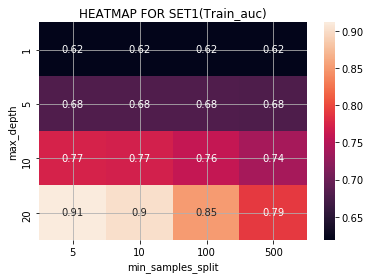

In [93]:
sns.heatmap(train_auc,annot=True,xticklabels=[5, 10,100, 500], yticklabels=[1, 5, 10, 20],)
plt.xlabel("min_samples_split")
plt.ylabel("max_depth")
plt.title("HEATMAP FOR SET1(Train_auc)")
plt.grid()
plt.show()

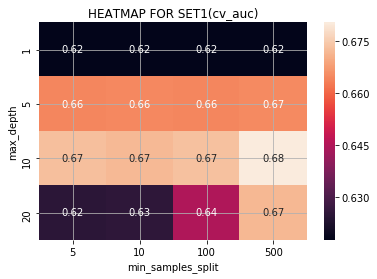

In [94]:
sns.heatmap(cv_auc,annot=True,xticklabels=[5, 10,100, 500], yticklabels=[1, 5, 10, 20],)
plt.xlabel("min_samples_split")
plt.ylabel("max_depth")
plt.title("HEATMAP FOR SET1(cv_auc)")
plt.grid()
plt.show()

## Summary
- we got max cv_auc for min_sample_split = 500 and depth = 10

In [95]:
param = {'max_depth' : [10],'min_samples_split' : [500]}

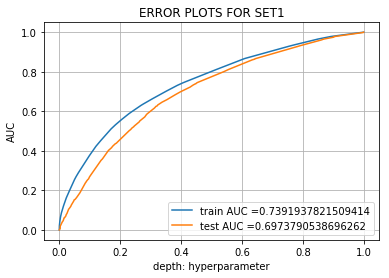

In [96]:
#decision tree classifier auc curve
#https://stackoverflow.com/questions/48220125/how-to-generate-roc-curve-with-cross-validation-using-sgd-classifier-loss-hinge
from sklearn.metrics import roc_curve, auc
dt = GridSearchCV(DecisionTreeClassifier(class_weight="balanced"), param, scoring = 'roc_auc',cv=3)
dt.fit(x_tr_set1, y_train)

y_train_pred = dt.predict_proba(x_tr_set1)[:,1]   
y_test_pred = dt.predict_proba(x_te_set1)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS FOR SET1")
plt.grid()
plt.show()

# summary
- this shows my training is good,
- test auc is also considerable

#### 2.4.1.1 Graphviz visualization of Decision Tree on BOW,<font color='red'> SET 1</font>

In [97]:
from sklearn import tree
import pydotplus
from IPython.display import Image


dt_model = DecisionTreeClassifier(min_samples_split=500,class_weight="balanced",max_depth=4)
dt = dt_model.fit(x_tr_set1, y_train)
dot_data = tree.export_graphviz(dt_model,feature_names=feature_name_bow,class_names=['0','1']) 

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
graph.write_pdf("set1.pdf")
graph.write_png("set1.png")

True

In [98]:
# we are writing our own function for predict, with defined threshold
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(fpr*(1-tpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

the maximum value of tpr*(1-fpr) 0.46120901360136046 for threshold 0.456


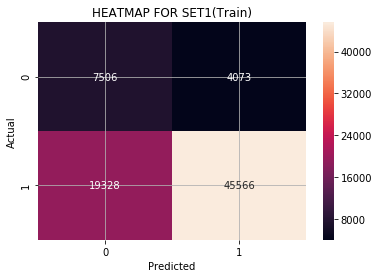

In [99]:
# confusion matrix set1
from sklearn.metrics import confusion_matrix
train_confusion_matrix= confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
sns.heatmap(train_confusion_matrix,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("HEATMAP FOR SET1(Train)")
plt.grid()
plt.show()



the maximum value of tpr*(1-fpr) 0.4280714537686749 for threshold 0.465


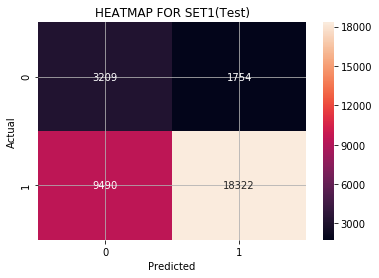

In [100]:

test_confusion_matrix = confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))
sns.heatmap(test_confusion_matrix,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("HEATMAP FOR SET1(Test)")
plt.grid()
plt.show()

In [101]:
# getting data points of the false positive.
def false_positive_datapoints(y_test,y_pred):
    false_positive = []
    for i in range(len(y_test)):
        if y_test[i] == 0 and y_pred[i] == 1:
            false_positive.append(i)
    return false_positive      

In [102]:
#total false positive points for set1
false_positive = false_positive_datapoints(y_test,predict(y_test_pred, te_thresholds, test_fpr, test_tpr))
print(len(false_positive))

the maximum value of tpr*(1-fpr) 0.4280714537686749 for threshold 0.465
1754


In [103]:
# fp = false_positive
# building our required dataframe
fp_essay = x_test.iloc[false_positive,[11]]
fp_price = x_test.iloc[false_positive,[7]]
fp_prev_posted_pro = x_test.iloc[false_positive,[6]]

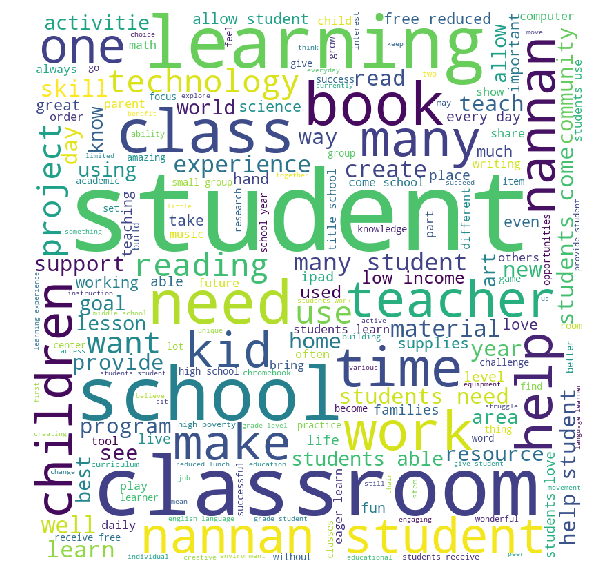

In [104]:
# word cloud for set1
from wordcloud import WordCloud, STOPWORDS 

comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in fp_essay.clean_preprocessed_essays: 
        
    # split the value 
    tokens = val.split() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# summary
- [student,classroom,learning,school,class,project] these words occurs with a high frequency in my fp_essay dataset

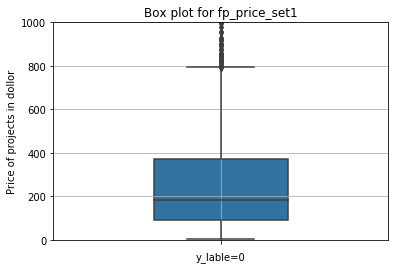

In [105]:
#boxplots
# They are false positive points that's why there y_label = 0 for each datapoint
sns.boxplot(y='price', data=fp_price)
plt.title('Box plot for fp_price_set1')
plt.xlabel('y_lable=0')
plt.ylabel('Price of projects in dollor')
plt.axis([-1,1,0,1000])
plt.grid()
plt.show()

## Summary
- we have lot of outliers do we zoomed our box plot
- flase_positive points have 75th percentile (price value) lower than approx 375

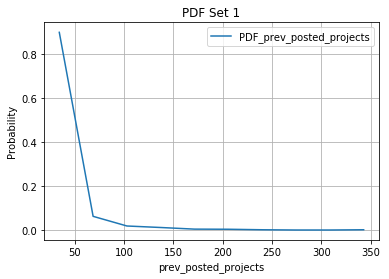

In [106]:
count, bin_edge = np.histogram(fp_prev_posted_pro['teacher_number_of_previously_posted_projects'], bins=10, density = True)
pdf = count/sum(count)

plt.plot(bin_edge[1:],pdf,label='PDF_prev_posted_projects')
plt.title('PDF Set 1')
plt.ylabel('Probability')
plt.xlabel('prev_posted_projects')
plt.legend()
plt.grid()

## Summary
- lower number of previously_posted_projects have higher value pdf
- it means that if there is low no. of previously_posted_projects then it has higher chance to be a false positive point
- after (previously_posted_projects) 50 there is very less frequency of previously_posted_projects

### 2.4.2 Applying Decision Trees on TFIDF,<font color='red'> SET 2</font>

In [107]:
x_tr_set2 = hstack((x_train_categories_ohe,x_train_subcategories_ohe,x_train_state_ohe,x_train_teacher_prefix_ohe,x_train_project_grade_ohe,x_train_essay_tfidf,x_train_title_tfidf,x_train_price_norm,x_train_quantity_norm,x_train_pre_posted_project_norm,x_train_essay_length_norm,x_train_title_length_norm,x_train_sentiment_positive_norm,x_train_sentiment_negative_norm,x_train_sentiment_neutral_norm,x_train_sentiment_compound_norm)).tocsr()
x_te_set2 = hstack((x_test_categories_ohe,x_test_subcategories_ohe,x_test_state_ohe,x_test_teacher_prefix_ohe,x_test_project_grade_ohe,x_test_essay_tfidf,x_test_title_tfidf,x_test_price_norm,x_test_quantity_norm,x_test_pre_posted_project_norm,x_test_essay_length_norm,x_test_title_length_norm,x_test_sentiment_positive_norm,x_test_sentiment_negative_norm,x_test_sentiment_neutral_norm,x_test_sentiment_compound_norm)).tocsr()

print("Final Data matrix")
print(x_tr_set2.shape, y_train.shape)
print(x_te_set2.shape, y_test.shape)

Final Data matrix
(76473, 149124) (76473,)
(32775, 149124) (32775,)


In [108]:
# Applying Decision tree using SGDClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import math

train_auc = []
cv_auc = []
tuned_param = {'max_depth': [1, 5, 10, 50,100],'min_samples_split': [5, 10,100, 500]}


dt = GridSearchCV(DecisionTreeClassifier(min_samples_split=100,class_weight='balanced'), tuned_param, scoring = 'roc_auc',n_jobs = 4,cv=3)
dt.fit(x_tr_set2, y_train)
        
train_auc = dt.cv_results_['mean_train_score']
cv_auc = dt.cv_results_['mean_test_score']


In [109]:
train_auc = train_auc.reshape(5,4)
cv_auc = cv_auc.reshape(5,4)

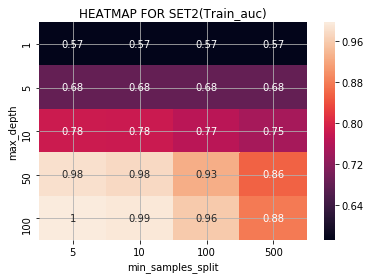

In [110]:
sns.heatmap(train_auc,annot=True,xticklabels=[5, 10,100, 500], yticklabels=[1, 5, 10, 50,100])
plt.xlabel("min_samples_split")
plt.ylabel("max_depth")
plt.title("HEATMAP FOR SET2(Train_auc)")
plt.grid()
plt.show()

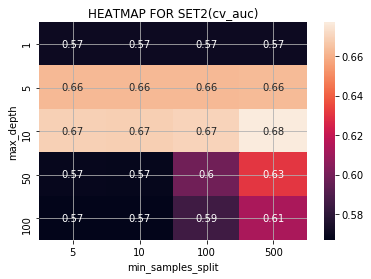

In [111]:
sns.heatmap(cv_auc,annot=True,xticklabels=[5, 10,100, 500], yticklabels=[1, 5, 10, 50,100],)
plt.xlabel("min_samples_split")
plt.ylabel("max_depth")
plt.title("HEATMAP FOR SET2(cv_auc)")
plt.grid()
plt.show()

## Summary
- we got max cv_auc for min_sample_split = 500 and depth = 10

In [112]:
param = {'max_depth' : [10],'min_samples_split' : [500]}

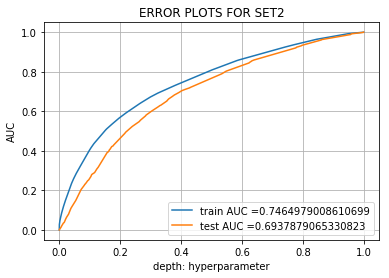

In [113]:
#decision tree classifier auc curve
#https://stackoverflow.com/questions/48220125/how-to-generate-roc-curve-with-cross-validation-using-sgd-classifier-loss-hinge
from sklearn.metrics import roc_curve, auc
dt = GridSearchCV(DecisionTreeClassifier(class_weight="balanced"), param, scoring = 'roc_auc',cv=3)
dt.fit(x_tr_set2, y_train)

y_train_pred = dt.predict_proba(x_tr_set2)[:,1]   
y_test_pred = dt.predict_proba(x_te_set2)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS FOR SET2")
plt.grid()
plt.show()

## Summary
- this shows my training is good,
- test auc is also considerable

#### 2.4.2.1 Graphviz visualization of Decision Tree on TFIDF,<font color='red'> SET 2</font>

In [114]:
from sklearn import tree
import pydotplus
from IPython.display import Image


dt_model = DecisionTreeClassifier(min_samples_split=500,class_weight="balanced",max_depth=4)
dt = dt_model.fit(x_tr_set2, y_train)
dot_data = tree.export_graphviz(dt_model,feature_names=feature_name_tfidf,class_names=['0','1']) 

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
graph.write_pdf("set2.pdf")
graph.write_png("set2.png")

True

the maximum value of tpr*(1-fpr) 0.47124528384810405 for threshold 0.403


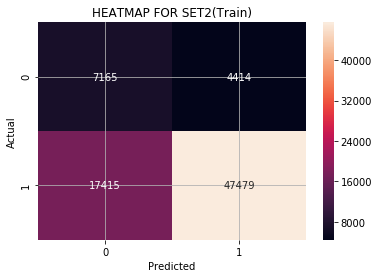

In [115]:
# confusion matrix set2
from sklearn.metrics import confusion_matrix
train_confusion_matrix= confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
sns.heatmap(train_confusion_matrix,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("HEATMAP FOR SET2(Train)")
plt.grid()
plt.show()


the maximum value of tpr*(1-fpr) 0.42474104142262115 for threshold 0.489


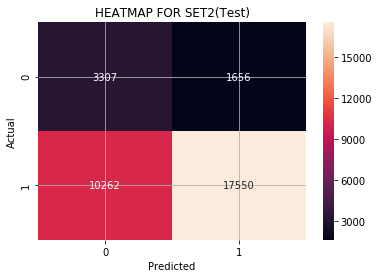

In [116]:

test_confusion_matrix = confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))
sns.heatmap(test_confusion_matrix,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("HEATMAP FOR SET2(Test)")
plt.grid()
plt.show()

In [117]:
#total false positive points for set2
false_positive = false_positive_datapoints(y_test,predict(y_test_pred, te_thresholds, test_fpr, test_tpr))
print(len(false_positive))

the maximum value of tpr*(1-fpr) 0.42474104142262115 for threshold 0.489
1656


In [118]:
# fp = false_positive
# building our required dataframe
fp_essay = x_test.iloc[false_positive,[11]]
fp_price = x_test.iloc[false_positive,[7]]
fp_prev_posted_pro = x_test.iloc[false_positive,[6]]

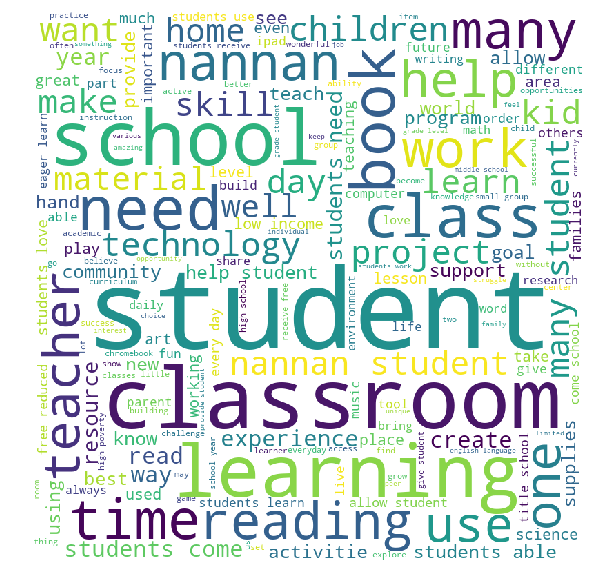

In [119]:
# word cloud for set1
from wordcloud import WordCloud, STOPWORDS 

comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in fp_essay.clean_preprocessed_essays: 
        
    # split the value 
    tokens = val.split() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## summary
- [student,classroom,learning,school,class,project] these words occurs with a high frequency in my fp_essay dataset

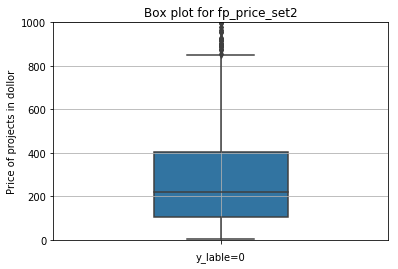

In [120]:
#boxplots
# They are false positive points that's why there y_label = 0 for each datapoint
sns.boxplot(y='price', data=fp_price)
plt.title('Box plot for fp_price_set2')
plt.xlabel('y_lable=0')
plt.ylabel('Price of projects in dollor')
plt.axis([-1,1,0,1000])
plt.grid()
plt.show()

## summary
- we have lot of outliers do we zoomed our box plot
- flase_positive points have 75th percentile (price value) lower than 375

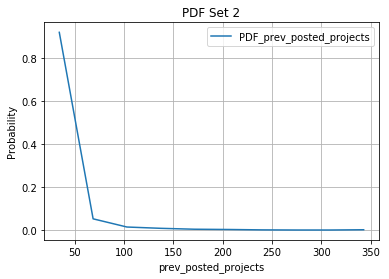

In [121]:
count, bin_edge = np.histogram(fp_prev_posted_pro['teacher_number_of_previously_posted_projects'], bins=10, density = True)
pdf = count/sum(count)

plt.plot(bin_edge[1:],pdf,label='PDF_prev_posted_projects')
plt.title('PDF Set 2')
plt.ylabel('Probability')
plt.xlabel('prev_posted_projects')
plt.legend()
plt.grid()

## summary
- lower number of previously_posted_projects have higher value pdf
- it means that if there is low no. of previously_posted_projects then it has higher chance to be a false positive point
- after (previously_posted_projects) 50 there is very less frequency of previously_posted_projects

### 2.4.3 Applying Decision Trees on AVG W2V,<font color='red'> SET 3</font>

In [122]:
x_tr_set3 = hstack((x_train_categories_ohe,x_train_subcategories_ohe,x_train_state_ohe,x_train_teacher_prefix_ohe,x_train_project_grade_ohe,x_train_avg_w2v_essays,x_train_avg_w2v_titles,x_train_price_norm,x_train_quantity_norm,x_train_pre_posted_project_norm,x_train_essay_length_norm,x_train_title_length_norm,x_train_sentiment_positive_norm,x_train_sentiment_negative_norm,x_train_sentiment_neutral_norm,x_train_sentiment_compound_norm)).tocsr()
x_te_set3 = hstack((x_test_categories_ohe,x_test_subcategories_ohe,x_test_state_ohe,x_test_teacher_prefix_ohe,x_test_project_grade_ohe,x_test_avg_w2v_titles,x_test_avg_w2v_essays,x_test_price_norm,x_test_quantity_norm,x_test_pre_posted_project_norm,x_test_essay_length_norm,x_test_title_length_norm,x_test_sentiment_positive_norm,x_test_sentiment_negative_norm,x_test_sentiment_neutral_norm,x_test_sentiment_compound_norm)).tocsr()

print("Final Data matrix")
print(x_tr_set3.shape, y_train.shape)
print(x_te_set3.shape, y_test.shape)

Final Data matrix
(76473, 708) (76473,)
(32775, 708) (32775,)


In [123]:
# Applying Decision tree using SGDClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import math

train_auc = []
cv_auc = []
tuned_param = {'max_depth': [1, 5, 10, 20],'min_samples_split': [5, 10,100, 500]}


dt = GridSearchCV(DecisionTreeClassifier(min_samples_split=500,class_weight='balanced'), tuned_param, scoring = 'roc_auc',n_jobs = 4,cv=3)
dt.fit(x_tr_set3, y_train)
        
train_auc = dt.cv_results_['mean_train_score']
cv_auc = dt.cv_results_['mean_test_score']


In [124]:
train_auc = train_auc.reshape(4,4)
cv_auc = cv_auc.reshape(4,4)

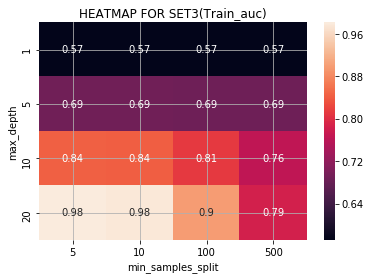

In [125]:
sns.heatmap(train_auc,annot=True,xticklabels=[5, 10,100, 500], yticklabels=[1, 5, 10, 20],)
plt.xlabel("min_samples_split")
plt.ylabel("max_depth")
plt.title("HEATMAP FOR SET3(Train_auc)")
plt.grid()
plt.show()

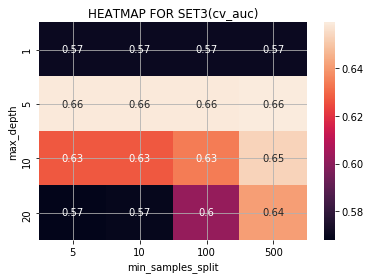

In [126]:
sns.heatmap(cv_auc,annot=True,xticklabels=[5, 10,100, 500], yticklabels=[1, 5, 10, 20],)
plt.xlabel("min_samples_split")
plt.ylabel("max_depth")
plt.title("HEATMAP FOR SET3(cv_auc)")
plt.grid()
plt.show()

## Summary
- we got max cv_auc for min_sample_split = 500 and depth = 5

In [127]:

param = {'max_depth' : [5],'min_samples_split':[500]}

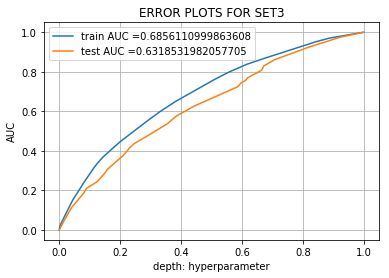

In [128]:
#decision tree classifier auc curve
#https://stackoverflow.com/questions/48220125/how-to-generate-roc-curve-with-cross-validation-using-sgd-classifier-loss-hinge
from sklearn.metrics import roc_curve, auc
dt = GridSearchCV(DecisionTreeClassifier(class_weight="balanced"), param, scoring = 'roc_auc',cv=3)
dt.fit(x_tr_set3, y_train)

y_train_pred = dt.predict_proba(x_tr_set3)[:,1]   
y_test_pred = dt.predict_proba(x_te_set3)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS FOR SET3")
plt.grid()
plt.show()

## Summary
- this shows my training is good,
- test auc is also considerable

the maximum value of tpr*(1-fpr) 0.40168254959925037 for threshold 0.502


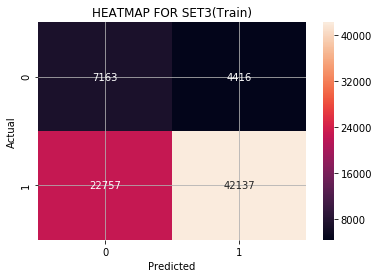

In [129]:
# confusion matrix set3
from sklearn.metrics import confusion_matrix
train_confusion_matrix= confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
sns.heatmap(train_confusion_matrix,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("HEATMAP FOR SET3(Train)")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.35445918377903574 for threshold 0.502


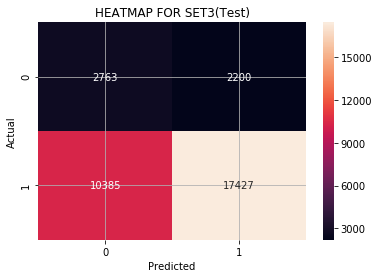

In [130]:

test_confusion_matrix = confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))
sns.heatmap(test_confusion_matrix,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("HEATMAP FOR SET3(Test)")
plt.grid()
plt.show()

In [131]:
#total false positive points for set3
false_positive = false_positive_datapoints(y_test,predict(y_test_pred, te_thresholds, test_fpr, test_tpr))
print(len(false_positive))

the maximum value of tpr*(1-fpr) 0.35445918377903574 for threshold 0.502
2200


In [132]:
# fp = false_positive
# building our required dataframe
fp_essay = x_test.iloc[false_positive,[11]]
fp_price = x_test.iloc[false_positive,[7]]
fp_prev_posted_pro = x_test.iloc[false_positive,[6]]

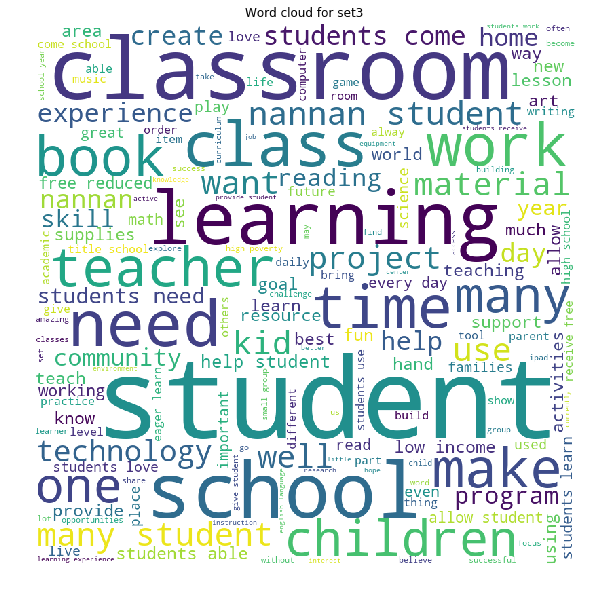

In [133]:
# word cloud for set3
from wordcloud import WordCloud, STOPWORDS 

comment_words = ' '
stopwords = set(STOPWORDS) 
  
for val in fp_essay.clean_preprocessed_essays: 
        
    # split the value 
    tokens = val.split() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.title("Word cloud for set3")
plt.tight_layout(pad = 0) 
  
plt.show()

## summary
- [student,classroom,learning,school,class,project] these words occurs with a high frequency in my fp_essay dataset

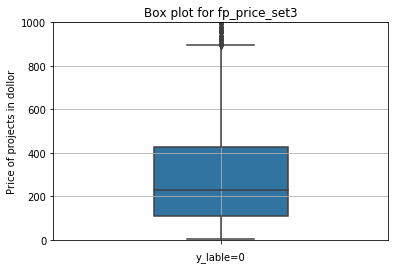

In [134]:
#boxplots
# They are false positive points that's why there y_label = 0 for each datapoint
sns.boxplot(y='price', data=fp_price)
plt.title('Box plot for fp_price_set3')
plt.xlabel('y_lable=0')
plt.ylabel('Price of projects in dollor')
plt.axis([-1,1,0,1000])
plt.grid()
plt.show()

## summary
- we have lot of outliers do we zoomed our box plot
- flase_positive points have 75th percentile (price value) lower than 375

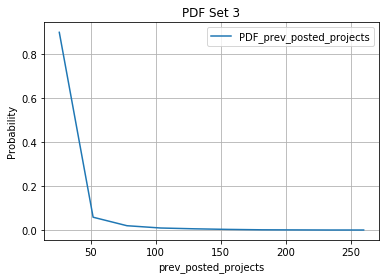

In [135]:
#pdf
count, bin_edge = np.histogram(fp_prev_posted_pro['teacher_number_of_previously_posted_projects'], bins=10, density = True)
pdf = count/sum(count)

plt.plot(bin_edge[1:],pdf,label='PDF_prev_posted_projects')
plt.title('PDF Set 3')
plt.ylabel('Probability')
plt.xlabel('prev_posted_projects')
plt.legend()
plt.grid()

## summary
- lower number of previously_posted_projects have higher value pdf
- it means that if there is low no. of previously_posted_projects then it has higher chance to be a false positive point
- after (previously_posted_projects) 70 there is very less frequency of previously_posted_projects

### 2.4.4 Applying Decision Trees on TFIDF W2V,<font color='red'> SET 4</font>

In [136]:
x_tr_set4 = hstack((x_train_categories_ohe,x_train_subcategories_ohe,x_train_state_ohe,x_train_teacher_prefix_ohe,x_train_project_grade_ohe,x_train_tfidf_w2v_essays,x_train_tfidf_w2v_titles,x_train_price_norm,x_train_quantity_norm,x_train_pre_posted_project_norm,x_train_essay_length_norm,x_train_title_length_norm,x_train_sentiment_positive_norm,x_train_sentiment_negative_norm,x_train_sentiment_neutral_norm,x_train_sentiment_compound_norm)).tocsr()
x_te_set4 = hstack((x_test_categories_ohe,x_test_subcategories_ohe,x_test_state_ohe,x_test_teacher_prefix_ohe,x_test_project_grade_ohe,x_test_tfidf_w2v_titles,x_test_tfidf_w2v_essays,x_test_price_norm,x_test_quantity_norm,x_test_pre_posted_project_norm,x_test_essay_length_norm,x_test_title_length_norm,x_test_sentiment_positive_norm,x_test_sentiment_negative_norm,x_test_sentiment_neutral_norm,x_test_sentiment_compound_norm)).tocsr()

print("Final Data matrix")
print(x_tr_set4.shape, y_train.shape)
print(x_te_set4.shape, y_test.shape)

Final Data matrix
(76473, 708) (76473,)
(32775, 708) (32775,)


In [137]:
# Applying Decision tree using SGDClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import math

train_auc = []
cv_auc = []
tuned_param = {'max_depth': [1, 5, 10, 50],'min_samples_split': [5, 10,100, 500]}

dt = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), tuned_param, scoring = 'roc_auc',n_jobs = 4,cv=3)
dt.fit(x_tr_set4, y_train)
        
train_auc = dt.cv_results_['mean_train_score']
cv_auc = dt.cv_results_['mean_test_score']


In [138]:
train_auc = train_auc.reshape(4,4)
cv_auc = cv_auc.reshape(4,4)

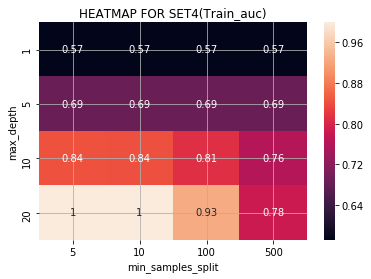

In [139]:
sns.heatmap(train_auc,annot=True,xticklabels=[5, 10,100, 500], yticklabels=[1, 5, 10, 20],)
plt.xlabel("min_samples_split")
plt.ylabel("max_depth")
plt.title("HEATMAP FOR SET4(Train_auc)")
plt.grid()
plt.show()

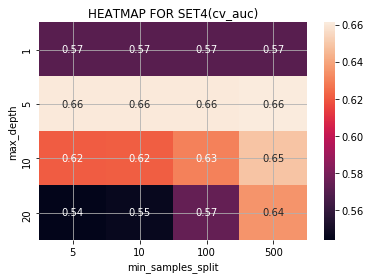

In [140]:
sns.heatmap(cv_auc,annot=True,xticklabels=[5, 10,100, 500], yticklabels=[1, 5, 10, 20],)
plt.xlabel("min_samples_split")
plt.ylabel("max_depth")
plt.title("HEATMAP FOR SET4(cv_auc)")
plt.grid()
plt.show()

## Summary
- we got max cv_auc for min_sample_split = 500 and depth = 5

In [141]:
param = {'max_depth' : [5],'min_samples_split':[500]}

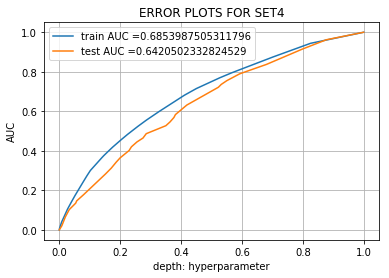

In [142]:
#decision tree classifier auc curve
#https://stackoverflow.com/questions/48220125/how-to-generate-roc-curve-with-cross-validation-using-sgd-classifier-loss-hinge
from sklearn.metrics import roc_curve, auc
dt = GridSearchCV(DecisionTreeClassifier(class_weight="balanced"), param, scoring = 'roc_auc',cv=3)
dt.fit(x_tr_set4, y_train)

y_train_pred = dt.predict_proba(x_tr_set4)[:,1]   
y_test_pred = dt.predict_proba(x_te_set4)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("depth: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS FOR SET4")
plt.grid()
plt.show()

## Summary
- this shows my training is good,
- test auc is also considerable

the maximum value of tpr*(1-fpr) 0.40250633548933396 for threshold 0.511


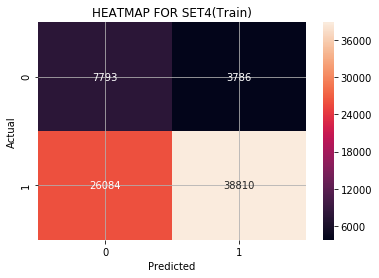

In [143]:
# confusion matrix set4
from sklearn.metrics import confusion_matrix
train_confusion_matrix= confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr))
sns.heatmap(train_confusion_matrix,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("HEATMAP FOR SET4(Train)")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.36701967057302715 for threshold 0.562


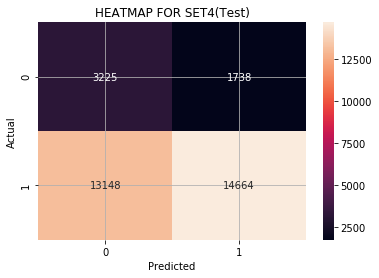

In [144]:

test_confusion_matrix = confusion_matrix(y_test, predict(y_test_pred, te_thresholds, test_fpr, test_tpr))
sns.heatmap(test_confusion_matrix,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("HEATMAP FOR SET4(Test)")
plt.grid()
plt.show()

In [145]:
#total false positive points for set4
false_positive = false_positive_datapoints(y_test,predict(y_test_pred, te_thresholds, test_fpr, test_tpr))
print(len(false_positive))

the maximum value of tpr*(1-fpr) 0.36701967057302715 for threshold 0.562
1738


In [146]:
# fp = false_positive
# building our required dataframe
fp_essay = x_test.iloc[false_positive,[11]]
fp_price = x_test.iloc[false_positive,[7]]
fp_prev_posted_pro = x_test.iloc[false_positive,[6]]

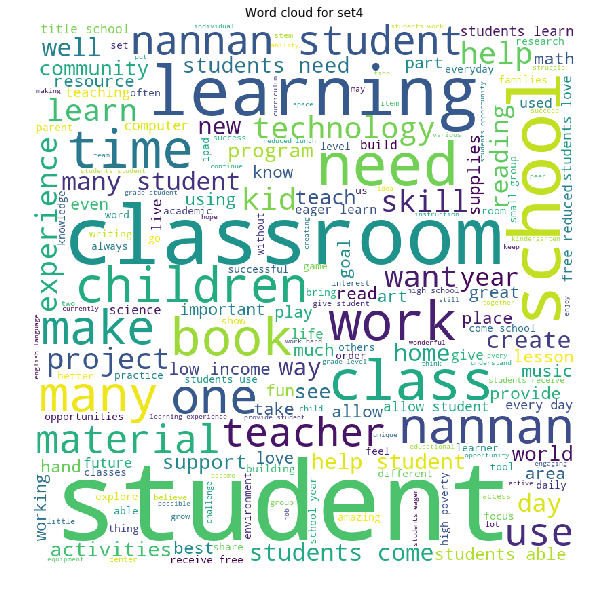

In [147]:
# word cloud for set4
from wordcloud import WordCloud, STOPWORDS 

comment_words = ' '
stopwords = set(STOPWORDS) 
  
for val in fp_essay.clean_preprocessed_essays: 
        
    # split the value 
    tokens = val.split() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.title("Word cloud for set4")
plt.tight_layout(pad = 0) 
  
plt.show()

## Summary
- [student,classroom,learning,school,class,project] these words occurs with a high frequency in my fp_essay dataset

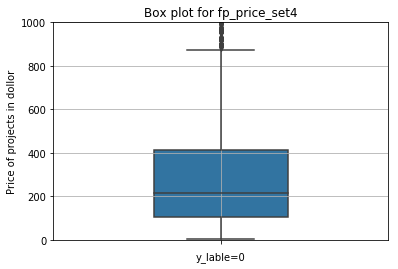

In [148]:
#boxplots
# They are false positive points that's why there y_label = 0 for each datapoint
sns.boxplot(y='price', data=fp_price)
plt.title('Box plot for fp_price_set4')
plt.xlabel('y_lable=0')
plt.ylabel('Price of projects in dollor')
plt.axis([-1,1,0,1000])
plt.grid()
plt.show()

## Summary
- we have lot of outliers do we zoomed our box plot
- flase_positive points have 75th percentile (price value) lower than 410

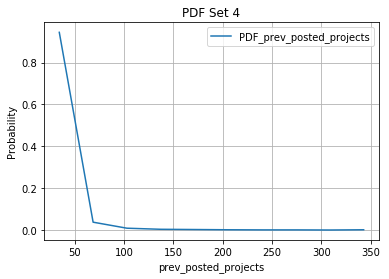

In [149]:
#pdf
count, bin_edge = np.histogram(fp_prev_posted_pro['teacher_number_of_previously_posted_projects'], bins=10, density = True)
pdf = count/sum(count)

plt.plot(bin_edge[1:],pdf,label='PDF_prev_posted_projects')
plt.title('PDF Set 4')
plt.ylabel('Probability')
plt.xlabel('prev_posted_projects')
plt.legend()
plt.grid()

## Summary
- lower number of previously_posted_projects have higher value pdf
- it means that if there is low no. of previously_posted_projects then it has higher chance to be a false positive point
- after (previously_posted_projects) 50 there is very less frequency of previously_posted_projects

<h2>2.5 [Task-2]Getting top 5k features using `feature_importances_`</h2>

In [150]:
x_tr_set2 = hstack((x_train_categories_ohe,x_train_subcategories_ohe,x_train_state_ohe,x_train_teacher_prefix_ohe,x_train_project_grade_ohe,x_train_essay_tfidf,x_train_price_norm,x_train_quantity_norm,x_train_pre_posted_project_norm,x_train_essay_length_norm,x_train_title_length_norm,x_train_sentiment_positive_norm,x_train_sentiment_negative_norm,x_train_sentiment_neutral_norm,x_train_sentiment_compound_norm)).tocsr()
x_te_set2 = hstack((x_test_categories_ohe,x_test_subcategories_ohe,x_test_state_ohe,x_test_teacher_prefix_ohe,x_test_project_grade_ohe,x_test_essay_tfidf,x_test_price_norm,x_test_quantity_norm,x_test_pre_posted_project_norm,x_test_essay_length_norm,x_test_title_length_norm,x_test_sentiment_positive_norm,x_test_sentiment_negative_norm,x_test_sentiment_neutral_norm,x_test_sentiment_compound_norm)).tocsr()

print("Final Data matrix")
print(x_tr_set2.shape, y_train.shape)
print(x_te_set2.shape, y_test.shape)

Final Data matrix
(76473, 144387) (76473,)
(32775, 144387) (32775,)


In [151]:
#decision tree classifier auc curve
#https://stackoverflow.com/questions/48220125/how-to-generate-roc-curve-with-cross-validation-using-sgd-classifier-loss-hinge
dt = DecisionTreeClassifier(min_samples_split=500,max_depth=10,class_weight="balanced")
model = dt.fit(x_tr_set2, y_train)

In [152]:
feature_importance = model.feature_importances_

feature_importance=np.argsort(feature_importance)[::-1] #argsort to get indices and then reverse it

# selecting 5k points with top features
feature_importance = feature_importance[:5000]
print(len(feature_importance))
print(feature_importance)

5000
[144378 144379  14812 ...  52943  52944  52945]


In [153]:
x_tr_set5 = x_tr_set2[:,feature_importance]
x_te_set5 = x_te_set2[:,feature_importance]
print("Final Data matrix")
print(x_tr_set5.shape, y_train.shape)
print(x_te_set5.shape, y_test.shape)

Final Data matrix
(76473, 5000) (76473,)
(32775, 5000) (32775,)


# Applying SVM On Set5

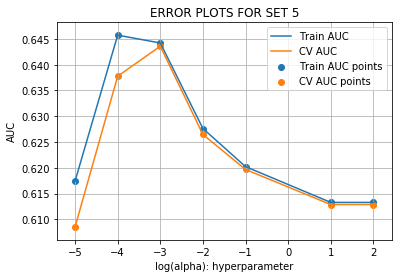

In [154]:
# Applying SVM using SGDClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
import math

train_auc = []
cv_auc = []
a = [10**-5,10**-4,10**-3, 10**-2, 10**-1,10**1,10**2]
tuned_parameters = {'alpha': [10**-5,10**-4, 10**-3,10**-2, 10**-1,10**1,10**2]}
b = [math.log(i,10) for i in a]

sgd = GridSearchCV(SGDClassifier(loss='hinge', penalty='l2',class_weight='balanced'), tuned_parameters, scoring = 'roc_auc',n_jobs = 5,cv=3)
sgd.fit(x_tr_set5, y_train)
        
train_auc = sgd.cv_results_['mean_train_score']
test_auc = sgd.cv_results_['mean_test_score']

plt.plot(b, train_auc, label='Train AUC')
plt.plot(b, test_auc, label='CV AUC')

plt.scatter(b, train_auc, label='Train AUC points')
plt.scatter(b, test_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log(alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS FOR SET 5")
plt.grid()
plt.show()

## summary
- we see a high peak at 10^-3
- so best alpha is 10^-3
- The model runs so fast with 5k features within 2-3 seconds.

In [155]:
best_alpha_set5 = 10**-3
param = {'alpha' : [best_alpha_set5]}

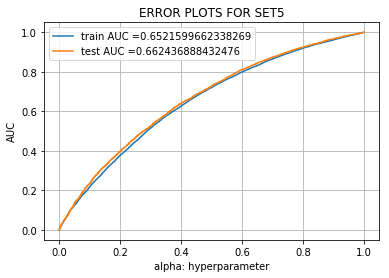

In [156]:
#sgd classifier auc curve
#https://stackoverflow.com/questions/48220125/how-to-generate-roc-curve-with-cross-validation-using-sgd-classifier-loss-hinge
from sklearn.metrics import roc_curve, auc
sgd = GridSearchCV(SGDClassifier(loss='hinge', penalty='l2',class_weight="balanced"), param, scoring = 'roc_auc',cv=3)
sgd.fit(x_tr_set5, y_train)

score_roc_train = sgd.decision_function(x_tr_set5)
score_roc_test = sgd.decision_function(x_te_set5)

train_fpr, train_tpr, tr_thresholds = metrics.roc_curve(y_train, score_roc_train)
test_fpr, test_tpr, te_thresholds = metrics.roc_curve(y_test, score_roc_test)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS FOR SET5")
plt.grid()
plt.show()

In [166]:
from prettytable import PrettyTable
y = PrettyTable()

y.field_names = ["Vectorizer", "Hyper Parameter(alpha)", "AUC(Train)","AUC(Test)"]

y.add_row(["TFidf(SVM with 149352 features)", 10**-3, 0.731,0.683])
y.add_row(["Tfidf(SVM with 5k features selected using decision tree)", 10**-3, 0.652,0.662])
print(y)

+----------------------------------------------------------+------------------------+------------+-----------+
|                        Vectorizer                        | Hyper Parameter(alpha) | AUC(Train) | AUC(Test) |
+----------------------------------------------------------+------------------------+------------+-----------+
|             TFidf(SVM with 149352 features)              |         0.001          |   0.731    |   0.683   |
| Tfidf(SVM with 5k features selected using decision tree) |         0.001          |   0.652    |   0.662   |
+----------------------------------------------------------+------------------------+------------+-----------+


## summary
- training and testing overlaps this means our test data perfectly fits into train model
- this seems so good

the maximum value of tpr*(1-fpr) 0.3761767703965251 for threshold -0.056


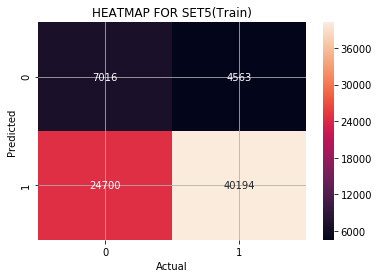

In [159]:
# confusion matrix set5
from sklearn.metrics import confusion_matrix
train_confusion_matrix= confusion_matrix(y_train, predict(score_roc_train, tr_thresholds, train_fpr, train_tpr))
sns.heatmap(train_confusion_matrix,annot=True,fmt="d")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("HEATMAP FOR SET5(Train)")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.385734458000856 for threshold 0.015


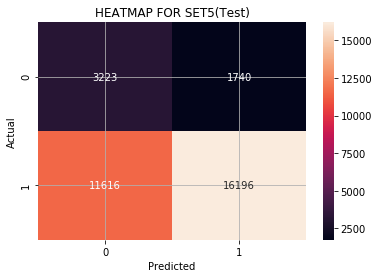

In [160]:

test_confusion_matrix = confusion_matrix(y_test, predict(score_roc_test, te_thresholds, test_fpr, test_tpr))
sns.heatmap(test_confusion_matrix,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("HEATMAP FOR SET5(Test)")
plt.grid()
plt.show()

In [161]:
#total false positive points for set5
false_positive = false_positive_datapoints(y_test,predict(score_roc_test, te_thresholds, test_fpr, test_tpr))
print(len(false_positive))

the maximum value of tpr*(1-fpr) 0.385734458000856 for threshold 0.015
1740


In [162]:
# fp = false_positive
# building our required dataframe
fp_essay = x_test.iloc[false_positive,[11]]
fp_price = x_test.iloc[false_positive,[7]]
fp_prev_posted_pro = x_test.iloc[false_positive,[6]]

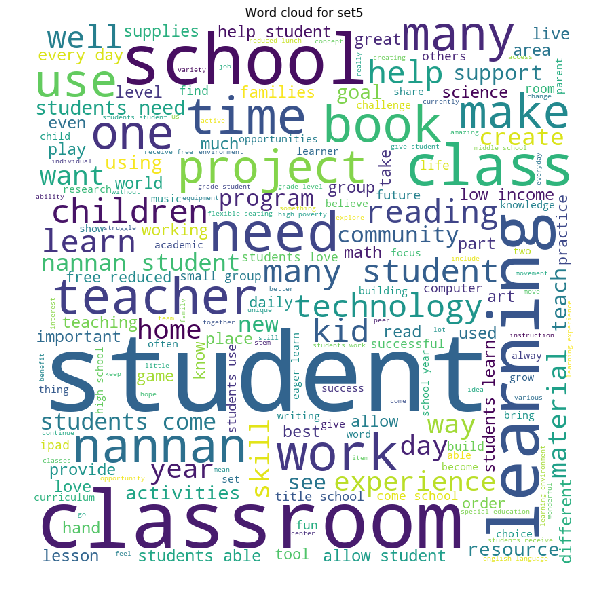

In [163]:
# word cloud for set5
from wordcloud import WordCloud, STOPWORDS 

comment_words = ' '
stopwords = set(STOPWORDS) 
  
for val in fp_essay.clean_preprocessed_essays: 
        
    # split the value 
    tokens = val.split() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.title("Word cloud for set5")
plt.tight_layout(pad = 0) 
  
plt.show()

## summary
- [student,classroom,learning,school,class,project] these words occurs with a high frequency in my fp_essay dataset

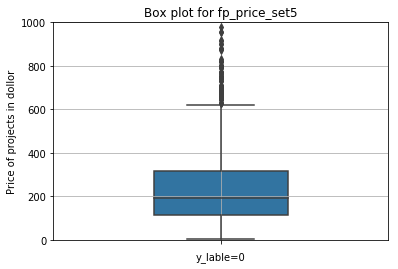

In [164]:
#boxplots
# They are false positive points that's why there y_label = 0 for each datapoint
sns.boxplot(y='price', data=fp_price)
plt.title('Box plot for fp_price_set5')
plt.xlabel('y_lable=0')
plt.ylabel('Price of projects in dollor')
plt.axis([-1,1,0,1000])
plt.grid()
plt.show()

## summary
- we have lot of outliers do we zoomed our box plot
- flase_positive points have 75th percentile (price value) lower than 520

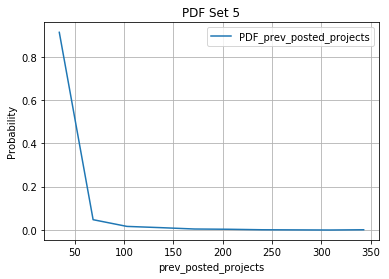

In [165]:
#pdf
count, bin_edge = np.histogram(fp_prev_posted_pro['teacher_number_of_previously_posted_projects'], bins=10, density = True)
pdf = count/sum(count)

plt.plot(bin_edge[1:],pdf,label='PDF_prev_posted_projects')
plt.title('PDF Set 5')
plt.ylabel('Probability')
plt.xlabel('prev_posted_projects')
plt.legend()
plt.grid()

## summary
- lower number of previously_posted_projects have higher value pdf
- it means that if there is low no. of previously_posted_projects then it has higher chance to be a false positive point
- after (previously_posted_projects) 70 there is very less frequency of previously_posted_projects

<h1>3. Conclusion</h1>

In [167]:

    
x = PrettyTable()

x.field_names = ["Vectorizer", "Hyper Parameter(depth)", "AUC(Train)","AUC(Test)"]

x.add_row(["BOW", 10, 0.739,0.697])
x.add_row(["Tfidf", 10, 0.746,0.693])
x.add_row(["Avg_w2v", 5, 0.685,0.631])
x.add_row(["Tfidf_w2v", 5, 0.685,0.642])
x.add_row(["Set5(5k SVM)", "0.001(alpha)", 0.652,0.662])

print(x)

+--------------+------------------------+------------+-----------+
|  Vectorizer  | Hyper Parameter(depth) | AUC(Train) | AUC(Test) |
+--------------+------------------------+------------+-----------+
|     BOW      |           10           |   0.739    |   0.697   |
|    Tfidf     |           10           |   0.746    |   0.693   |
|   Avg_w2v    |           5            |   0.685    |   0.631   |
|  Tfidf_w2v   |           5            |   0.685    |   0.642   |
| Set5(5k SVM) |      0.001(alpha)      |   0.652    |   0.662   |
+--------------+------------------------+------------+-----------+


## summary
- Best model is BOW
- i learned many things in this assignment, (word-cloud,graphviz)
- worked with false positive data and analyse it closely
- Top 5k model executes so fast as compared to real one.